Simon Silverstein

# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$

**Solution**

We have that

$$
\hat{\beta}_{OLS} = (X^TX)^{-1}X^T(X\beta + \epsilon)
$$

so

\begin{align*}
\mathbb{E}[\hat{\beta}_{OLS}] &= (X^TX)^{-1}X^T\mathbb{E}[X\beta + \epsilon] \\
&= (X^TX)^{-1}X^TX\beta \\
&= \beta

\end{align*}

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


**Solution**

\begin{align*}
\mathrm{Var}[\hat\beta_{OLS}] =& \mathbb{E}\left[
    ((X^TX)^{-1}X^Ty-\beta)
    ((X^TX)^{-1}X^Ty - \beta)^T
    \right] \\

=& \mathbb{E}\left[
    ((X^TX)^{-1}X^Ty-\beta)
    (y^TX(X^TX)^{-1} - \beta^T)
    \right] \\

=& (X^TX)^{-1}X^T\mathbb{E}[yy^T]X(X^TX)^{-1}\\
& -(X^TX)^{-1}X^T\mathbb{E}[y]\beta^T \\
& -\beta\mathbb{E}[y^T]X(X^TX)^{-1} \\
& + \beta\beta^T \\

=& (X^TX)^{-1}X^T\beta\beta^TX(X^TX)^{-1} + (X^TX)^{-1}X^T\sigma^2X(X^TX)^{-1} \\
& -(X^TX)^{-1}X^TX\beta\beta^T \\
& -\beta\beta^TX^TX(X^TX)^{-1} \\
& + \beta\beta^T \\

=& \beta\beta^T + \sigma^2(X^TX)^{-1} - \beta\beta^T-\beta\beta^T + \beta\beta^T \\

=& \sigma^2(X^TX)^{-1}
\end{align*}

We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


**Solution**

\begin{align*}
\mathbb{E}[\hat\beta_{\mathrm{Ridge}}] &= \mathbb{E}[(X^TX + \lambda I)^{-1}X^T(X\beta+\epsilon)] \\
&= (X^TX + \lambda I)^{-1}X^TX\beta
\end{align*}

We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


**b)** Why do we say that Ridge regression gives a biased estimate? Is this a problem?


We say that Ridge regression is biased since $\mathbb{E}[\hat\beta_{\mathrm{ridge}}] \neq \beta$

**c)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


**Solution**

$$
\mathrm{Var}[\hat\beta^{\mathrm{Ridge}}] = \mathrm{Var}[(X^TX+\lambda I)^{-1}X^TX\beta + (X^TX+\lambda I)^{-1}X^T\epsilon]
$$

The first term here is 0, since $\mathrm{Var}[\beta] = 0$

\begin{align*}
&= \mathrm{Var}[(X^TX+\lambda I)^{-1}X^T\epsilon] \\
&= \mathbb{E}[(X^TX+\lambda I)^{-1}X^T\epsilon\epsilon^TX(X^T+\lambda I)^{-1}] \\
&= \sigma^2(X^TX+\lambda I)^{-1}X^TX\{(X^TX + \lambda I)^{-1}\}^T
\end{align*}

We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$


**Solution**

\begin{align*}
\mathbb{E}[(y - \tilde{y})^2] &= \mathbb{E}[(f + \epsilon - \tilde{y})^2] \\
&= \mathbb{E}[((f - \mathbb{E}[\tilde{y}]) + \epsilon - (\tilde{y} - \mathbb{E}[\tilde{y}])^2] \\
&= \mathbb{E}[((f - \mathbb{E}[\tilde{y}]) - (\tilde{y} - \mathbb{E}[\tilde{y}])^2] + \sigma^2\\
\end{align*}

since all first-order $\epsilon$ terms vanish. Now

\begin{align*}
&= \mathbb{E}[(f - \mathbb{E}[\tilde{y}])^2 + (\tilde{y} - \mathbb{E}[\tilde{y}])^2 - 2(f - \mathbb{E}[\tilde{y}])(\tilde{y} - \mathbb{E}[\tilde{y}])] + \sigma^2.\\

\end{align*}

Since $y$ and $\tilde{y}$ are independent, the $\mathbb{E}$ can be distributed across the $2ab$ term, and $\mathbb{E}[(\tilde{y} - \mathbb{E}[\tilde{y}])] = \mathbb{E}[\tilde{y}] - \mathbb{E}[\tilde{y}] = 0$ makes the whole thing vanish. This leaves us with

$$
\mathbb{E}[(y - \tilde{y})^2] = \mathbb{E}[(f - \mathbb{E}[\tilde{y}])^2] + \mathbb{E}[(\tilde{y} - \mathbb{E}[\tilde{y}])^2] + \sigma^2,\\
$$

Which is exactly what we were looking for.

**b)** Explain what the terms mean and discuss their interpretations.

The expression says that we may think of the cost as how far off we are over all (bias) plus how far we off are per point, including noise (variance + $\sigma^2$)

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [29]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
targets = np.random.rand(bootstraps, n)

E_pred = np.mean(predictions, axis=1)

mse = np.sum((targets - predictions)**2, axis=1) / n
bias = np.sum((targets - np.expand_dims(E_pred, 1))**2, axis=1) / n
variance = np.sum((predictions - np.expand_dims(E_pred, 1))**2, axis=1) / n

# If (bias + variance) = mse, this should be approx. 0
print(f'Average difference: {np.mean(mse - (bias + variance))}')
(mse - (bias + variance))[:10]

Average difference: -0.0011139600572365963


array([-0.07387252,  0.21114959, -0.29931769, -0.36903803,  0.12008692,
        0.05470882,  0.11371815, -0.21387883, -0.47489577,  0.037973  ])

**From the output above, we see that the difference between the MSE and the sum of bias and variance is on the order of $10^{-1}$.**

**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

In [2]:
# The "/ 10" decreases the variance, the "+ 20" increases the bias
pred_b = predictions / 10 + 20

# recalculate bias and variance
E_pred_b = np.mean(pred_b, axis=1)
bias_b = np.sum((targets - np.expand_dims(E_pred_b, 1))**2, axis=1) / n
variance_b = np.sum((pred_b - np.expand_dims(E_pred_b, 1))**2, axis=1) / n

# report result
print(f'{'':<14}{'Old':>12}{'New':>12}')
print(f'{'Avg. Bias':<14}{np.mean(bias):>12.3f}{np.mean(bias_b):>12.3f}')
print(f'{'Avg. Variance':<14}{np.mean(variance):>12.3f}{np.mean(variance_b):>12.3f}')

                       Old         New
Avg. Bias          210.391     441.046
Avg. Variance        8.270       0.083



**c)** Change the prediction values in some way to increase the variance while decreasing the bias.


In [3]:
# The "* 2" increases the variance, the "- 10" decreases the bias (since the original bias was ~10)
pred_c = (predictions - 10) * 2

# recalculate bias and variance
E_pred_c = np.mean(pred_c, axis=1)
bias_c = np.sum((targets - np.expand_dims(E_pred_c, 1))**2, axis=1) / n
variance_c = np.sum((pred_c - np.expand_dims(E_pred_c, 1))**2, axis=1) / n

# report result
print(f'{'':<14}{'Old':>12}{'New':>12}')
print(f'{'Avg. Bias':<14}{np.mean(bias):>12.3f}{np.mean(bias_c):>12.3f}')
print(f'{'Avg. Variance':<14}{np.mean(variance):>12.3f}{np.mean(variance_c):>12.3f}')

                       Old         New
Avg. Bias          210.391      90.651
Avg. Variance        8.270      33.081


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib as mpl

plt.rcParams.update({
    'figure.dpi': 600,
    'figure.constrained_layout.use': True,
})

In [24]:
n = 1000
bootstraps = 1000

x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.05, n)

# split before creating features to standardize results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

biases = []
variances = []
mses = []

degs = range(1, 11)

for deg in degs:
    # create features
    features = PolynomialFeatures(deg).fit_transform(np.expand_dims(x_train, 1))
    test_features = PolynomialFeatures(deg).fit_transform(np.expand_dims(x_test, 1))

    predictions = []
    targets = []

    # bootstrap
    for b in range(bootstraps):
        X, y = resample(features, y_train)

        model = LinearRegression().fit(X, y)

        predictions.append(model.predict(test_features))
        targets.append(y_test)

    predictions = np.array(predictions)
    targets = np.array(targets)

    # calculate bias, variance, and mse
    E_pred = np.mean(predictions, axis=1)

    mse = np.sum((targets - predictions)**2, axis=1) / n
    bias = np.sum((targets - np.expand_dims(E_pred, 1))**2, axis=1) / n
    variance = np.sum((predictions - np.expand_dims(E_pred, 1))**2, axis=1) / n

    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

biases = np.array(biases)
variances = np.array(variances)
mses = np.array(mses)

Text(0.5, 0, 'Polynomial degree')

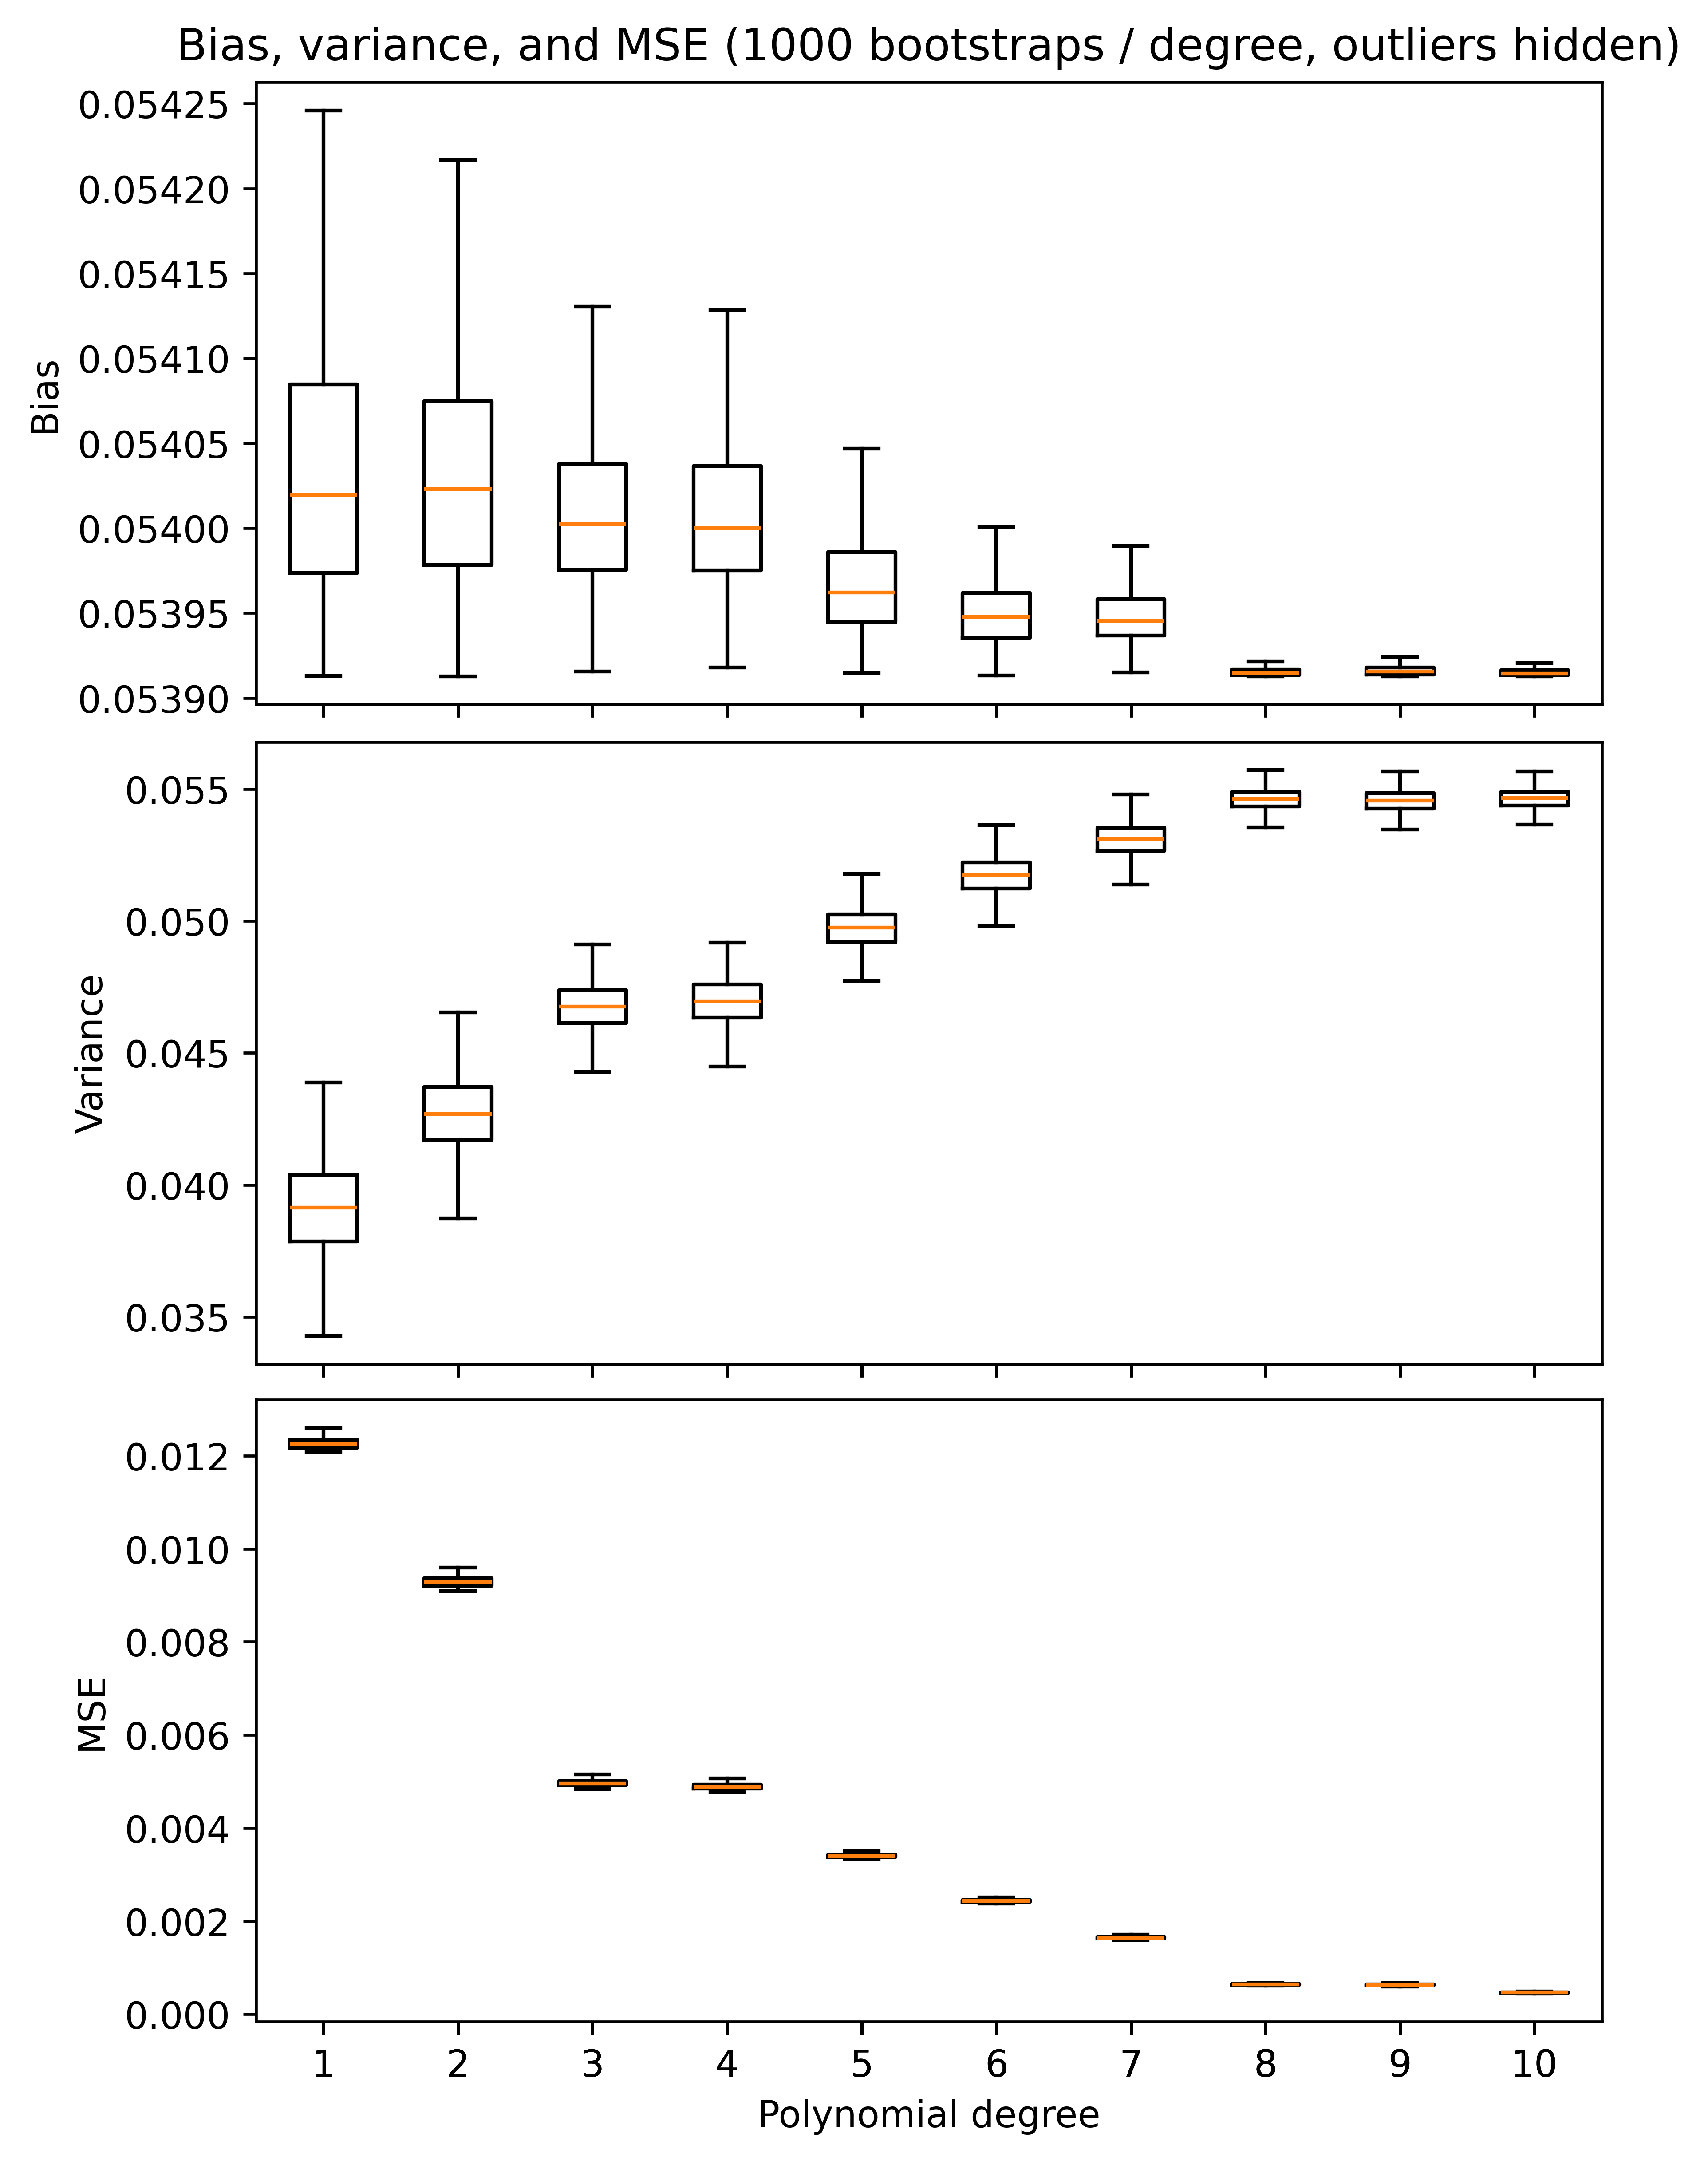

In [25]:
fig, axs = plt.subplots(3, sharex=True, figsize=(6,8))

ax = axs[0]

# ax.plot(degs, np.mean(biases, axis=1))
ax.boxplot(biases.T, positions=degs, showfliers=False)
# ax.violinplot(biases.T, positions=degs)
ax.set_ylabel('Bias')

ax.set_title('Bias, variance, and MSE (1000 bootstraps / degree, outliers hidden)')
ax = axs[1]

ax.boxplot(variances.T, positions=degs, showfliers=False);
# ax.violinplot(variances.T, positions=degs);
ax.set_ylabel('Variance')

ax = axs[2]

# ax.violinplot(mses.T, positions=degs);
ax.boxplot(mses.T, positions=degs, showfliers=False);
ax.set_ylabel('MSE')

ax.set_xlabel('Polynomial degree')

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

**From the above figure, we see that as the polynomial degree increases, bias decreases but variance increases.**

**NOTE: Although this is generally true, the shape above seems to be dominated by how the data is initially split into training/testing, and the figure changes dramatically when the cell is rerun.**

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


In [7]:
n = 10000
bootstraps = 1000

x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.05, n)

# split before creating features to standardize results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

biases = []
variances = []
mses = []

deg = 2

strapsizes = np.logspace(1, 3, 40)

for strapsize in strapsizes:
    # create features
    features = PolynomialFeatures(deg).fit_transform(np.expand_dims(x_train, 1))
    test_features = PolynomialFeatures(deg).fit_transform(np.expand_dims(x_test, 1))

    predictions = []
    targets = []

    # bootstrap
    for b in range(bootstraps):
        X, y = resample(features, y_train, n_samples=int(np.round(strapsize)))

        model = LinearRegression().fit(X, y)

        predictions.append(model.predict(test_features))
        targets.append(y_test)

    predictions = np.array(predictions)
    targets = np.array(targets)

    # calculate bias, variance, and mse
    E_pred = np.mean(predictions, axis=1)

    mse = np.sum((targets - predictions)**2, axis=1) / n
    bias = np.sum((targets - np.expand_dims(E_pred, 1))**2, axis=1) / n
    variance = np.sum((predictions - np.expand_dims(E_pred, 1))**2, axis=1) / n

    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

biases = np.array(biases)
variances = np.array(variances)
mses = np.array(mses)

Text(0.5, 0, 'Samples per bootstrap')

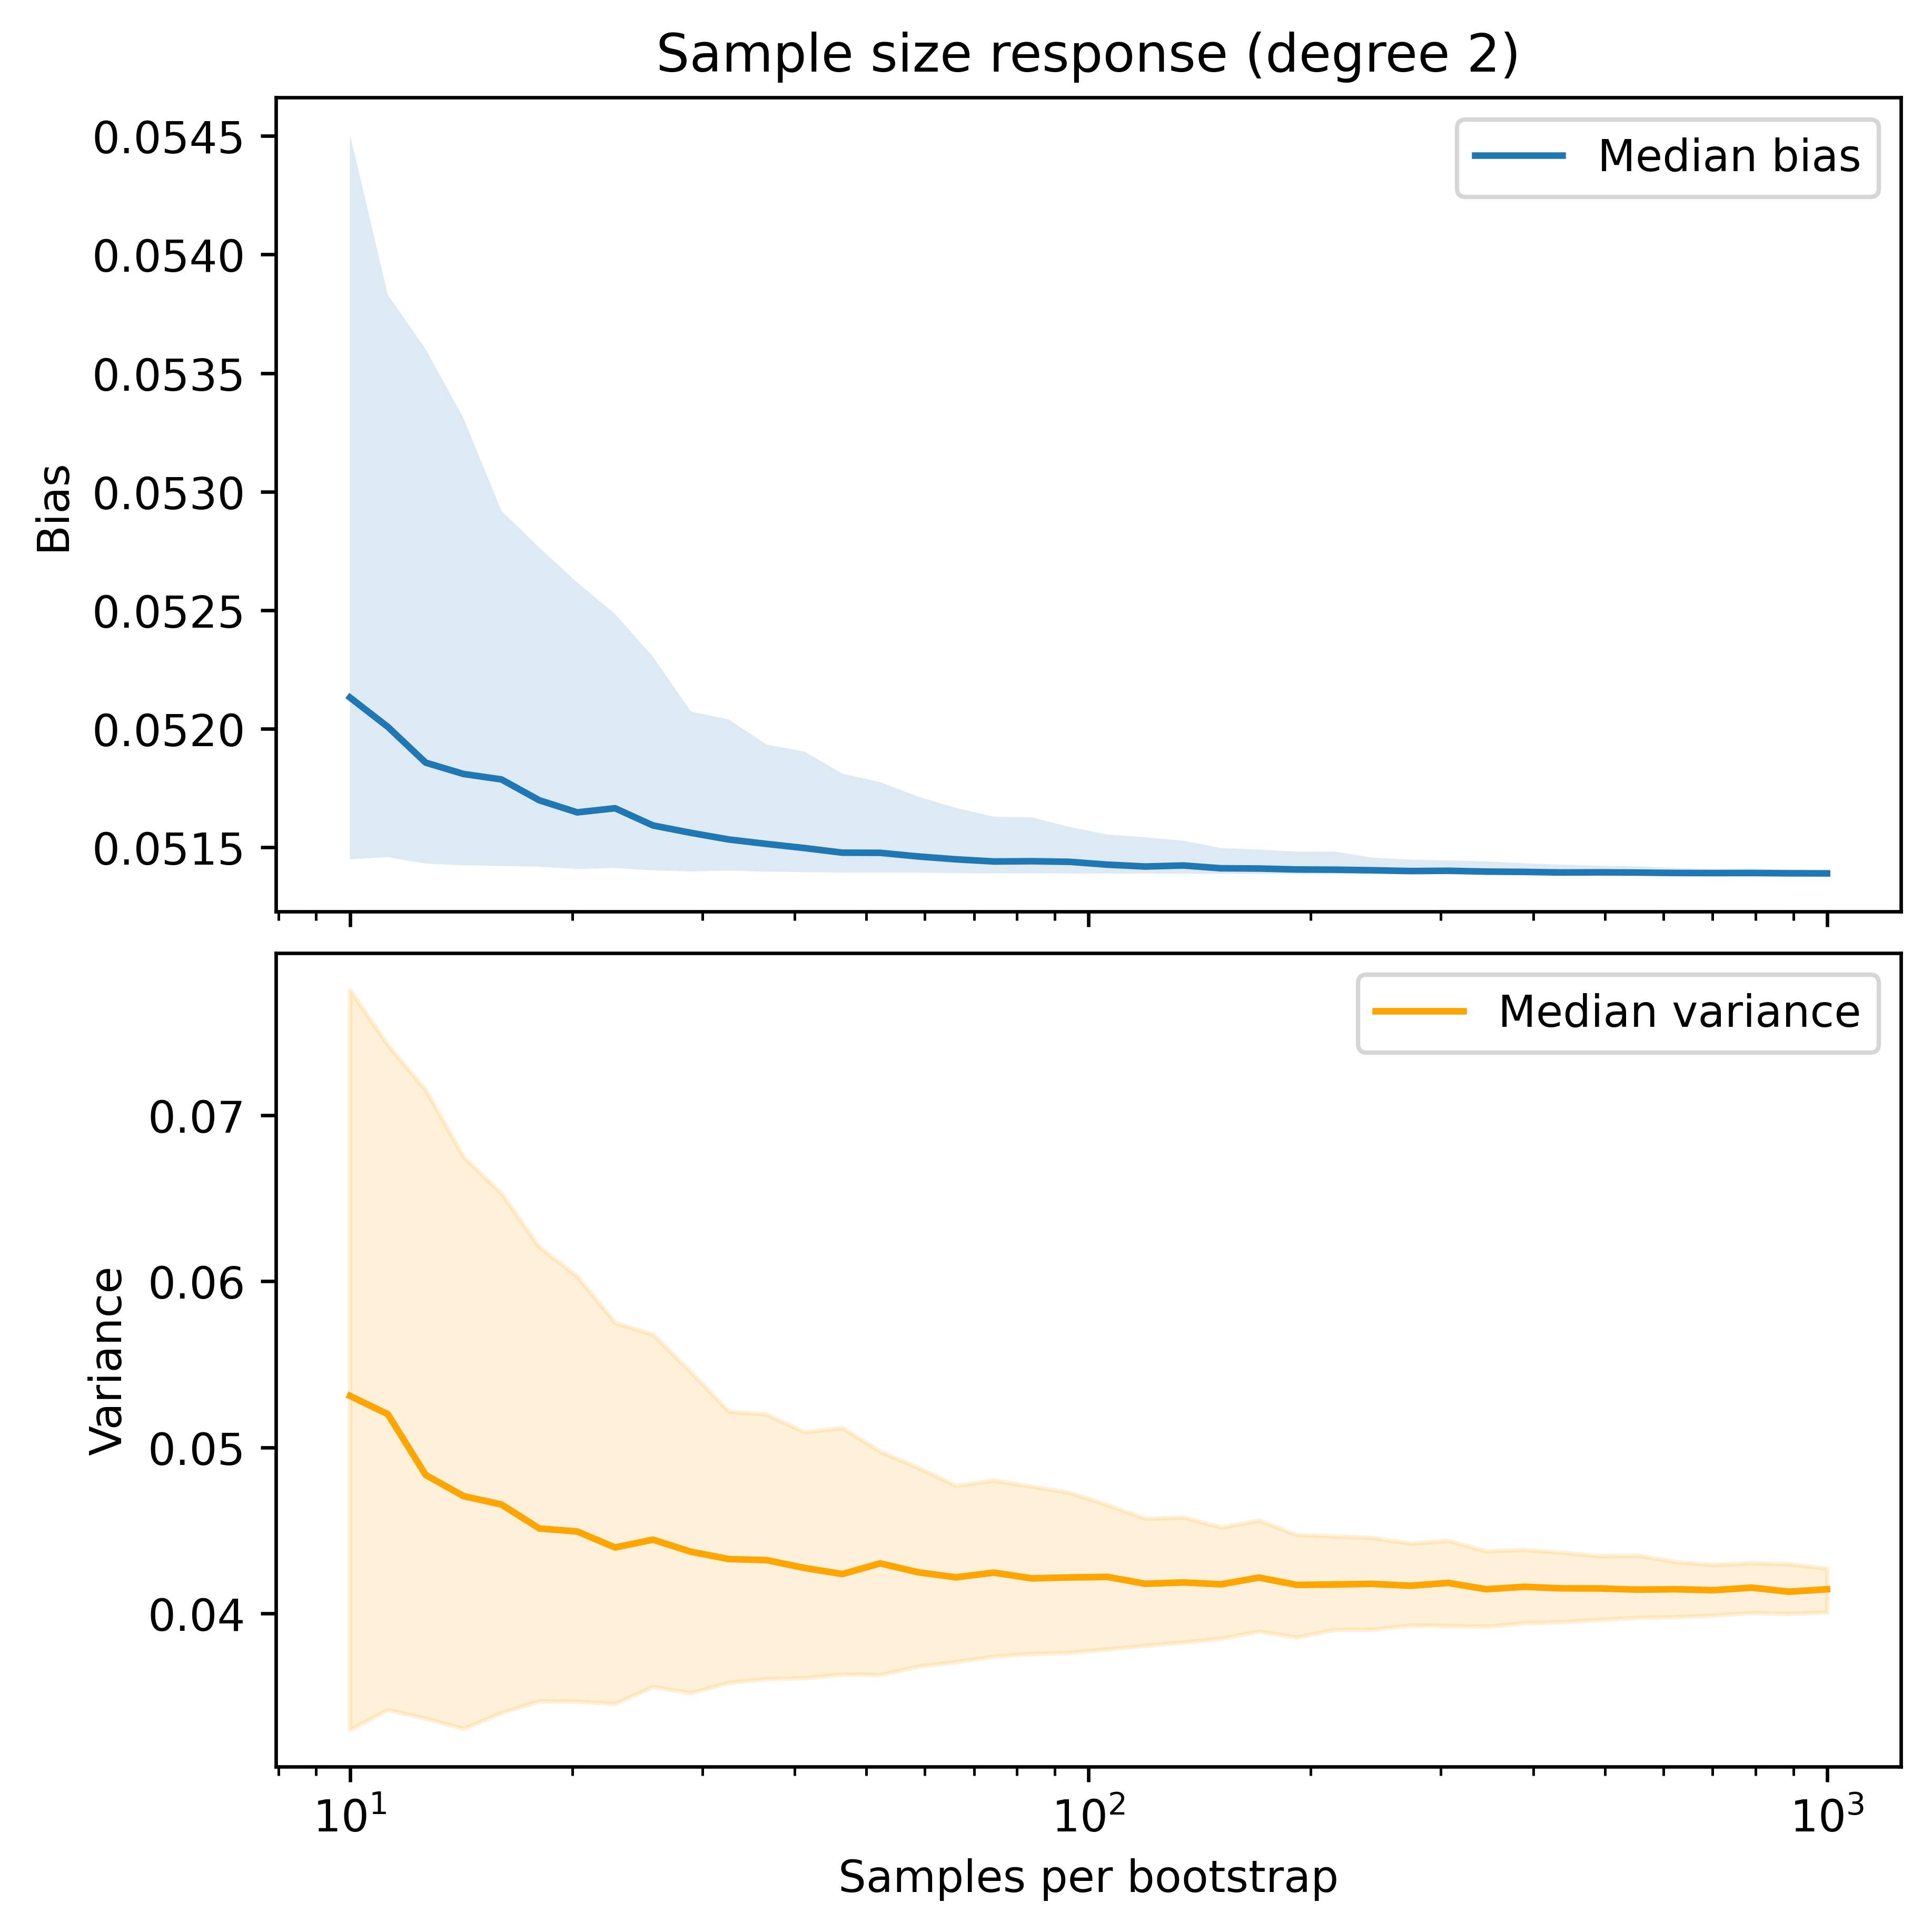

In [8]:
fig, axs = plt.subplots(2, sharex=True, figsize=(6,6))

ax = axs[0]

ax.plot(strapsizes, np.median(biases, axis=1), label='Median bias')
ax.fill_between(strapsizes,
                y1=np.quantile(biases, 0.16, axis=1),
                y2=np.quantile(biases, 0.84, axis=1),
                alpha=0.15)

ax.legend()

ax.set_ylabel('Bias')
ax.set_xscale('log')

ax.set_title(f'Sample size response (degree {deg})')
ax = axs[1]

ax.plot(strapsizes, np.median(variances, axis=1), label='Median variance', c='orange')
ax.fill_between(strapsizes,
                y1=np.quantile(variances, 0.16, axis=1),
                y2=np.quantile(variances, 0.84, axis=1),
                alpha=0.15, color='orange')

ax.legend()

ax.set_ylabel('Variance')
ax.set_xlabel('Samples per bootstrap')


**NOTE: In the above figure, 68% of bootstrap means & variances fell within the shaded regions**

Both the median per-bootstrap bias and variance shrunk when increasing samples. Notably, both also became more tightly distributed.

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

We scale the data for a few reasons, one of which is to avoid large absolute differences in the features which would otherwise drown out smaller features or cause numerical issues (consider the differences in response between $x^2$ and $x^{13}$). Mean of 0 and $\sigma^2=1$ also brings us closer to the statistical cases where our optimizations are mathematically proven to work.

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

OLS is independent of scale because any constant offset in the cost function disappears when we take the derivative, and any scale factor is ignored when we set it equal to zero.

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

Since the cost function of the ridge method is also sensitive to the absolute value of the parameters, offsetting the data actually changes where the minimum cost is.

**d)** Why do we say that the Ridge method gives a biased model?

We say the ridge method is biased because $\mathbb{E}[(y-\mathbb{E}[\tilde{y}])^2]$ is not equal to zero. See exercise 2.

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

The MSE is affected by any scaling of the $y$ data (either target or prediction) since it depends upon an *absolute* difference between $y$ and $\tilde{y}$. Scaling the feature matrix won't do anything, since you'll still get the same optimal parameters (just make sure your prediction is made with unscaled features).

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

The R $^2$ should not be affected by scaling, since any scaled effects from the target data would cancel each other in the fraction (and scaling the feature matrix does nothing to the optimal parameters). 

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

0: The model does no better than predicting the mean every time.

0.5: The squared error is half what it would be from just predicting the mean.

1: The model exactly predicts the target data.

**h)** What is an advantage of the R2 score over the MSE?


R $^2$ is guaranteed to be between 0 and 1.